In [1567]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn import linear_model
from sklearn.preprocessing import OneHotEncoder
import statsmodels.api as sm

In [1568]:
df_cfps2010famconf = pd.read_stata("cfps2010famconf_202008.dta", convert_categoricals=False)

In [1569]:
df_cfps2010famconf.head()

,pid,fid,cid,provcd,countyid,psu,subpopulation,subsample,code_a_p,tb2_a_p,...,feduc,foccupcode,foccupisco,fparty,mbirthy,meduc,moccupcode,moccupisco,mparty,releaseversion
0,110001101.0,110001.0,11830.0,11.0,45.0,45.0,6.0,1.0,101.0,1.0,...,NaN,NaN,NaN,NaN,1938.0,3.0,NaN,NaN,NaN,5.1
1,110001102.0,110001.0,11830.0,11.0,45.0,45.0,6.0,1.0,102.0,0.0,...,NaN,NaN,NaN,NaN,1934.0,NaN,NaN,NaN,NaN,5.1
2,110002101.0,110002.0,11830.0,11.0,45.0,45.0,6.0,1.0,101.0,1.0,...,1.0,90000.0,NaN,4.0,1929.0,1.0,90000.0,NaN,4.0,5.1
3,110002102.0,110002.0,11830.0,11.0,45.0,45.0,6.0,1.0,102.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.1
4,110002103.0,110002.0,11830.0,11.0,45.0,45.0,6.0,1.0,103.0,0.0,...,4.0,NaN,NaN,4.0,1969.0,6.0,10303.0,1143.0,4.0,5.1


In [1570]:
df_famconf_short = df_cfps2010famconf[['pid', 'fid', 'tb4_a_p', 'tb4_a_c1', 'tb4_a_c2', 'tb4_a_c3', 'tb4_a_c4',
                    'tb4_a_c5', 'tb4_a_c6', 'tb4_a_c7', 'tb4_a_c8', 'tb4_a_c9', 'tb4_a_c10']]

In [1571]:
df_famconf_short.head()

,pid,fid,tb4_a_p,tb4_a_c1,tb4_a_c2,tb4_a_c3,tb4_a_c4,tb4_a_c5,tb4_a_c6,tb4_a_c7,tb4_a_c8,tb4_a_c9,tb4_a_c10
0,110001101.0,110001.0,3.0,1.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0
1,110001102.0,110001.0,3.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0
2,110002101.0,110002.0,4.0,3.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0
3,110002102.0,110002.0,6.0,3.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0
4,110002103.0,110002.0,3.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0


In [1572]:
df_famconf_short = df_famconf_short.groupby('fid')['tb4_a_p', 'tb4_a_c1', 'tb4_a_c2', 'tb4_a_c3', 'tb4_a_c4', 'tb4_a_c5', 'tb4_a_c6', 'tb4_a_c7', 'tb4_a_c8', 'tb4_a_c9', 'tb4_a_c10'].max().reset_index()

<ipython-input-1572-044d71f7d14f>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_famconf_short = df_famconf_short.groupby('fid')['tb4_a_p', 'tb4_a_c1', 'tb4_a_c2', 'tb4_a_c3', 'tb4_a_c4', 'tb4_a_c5', 'tb4_a_c6', 'tb4_a_c7', 'tb4_a_c8', 'tb4_a_c9', 'tb4_a_c10'].max().reset_index()


In [1573]:
df_famconf_short.rename(columns={"tb4_a_p": "Edu Attainment of Parents"}, inplace=True)
df_famconf_short

,fid,Edu Attainment of Parents,tb4_a_c1,tb4_a_c2,tb4_a_c3,tb4_a_c4,tb4_a_c5,tb4_a_c6,tb4_a_c7,tb4_a_c8,tb4_a_c9,tb4_a_c10
0,110001.0,3.0,1.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0
1,110002.0,6.0,3.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0
2,110003.0,4.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0
3,110005.0,4.0,4.0,4.0,4.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0
4,110006.0,4.0,4.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0
...,...,...,...,...,...,...,...,...,...,...,...,...
14954,621867.0,3.0,3.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0
14955,621868.0,2.0,2.0,2.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0
14956,621869.0,4.0,2.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0
14957,621870.0,4.0,3.0,4.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0


In [1574]:
df_cfps2010famecon = pd.read_stata("cfps2010famecon_202008.dta")

In [1575]:
df_cfps2010famecon.head()

,fid,cid,provcd,countyid,fswt_nat,fswt_res,psu,subpopulation,subsample,urban,...,med,trco,eec,other,eptran,epwelf,mortage,expense,interviewerid,releaseversion
0,110001.0,11830.0,北京市,45.0,45632.25,26287.730469,45.0,其它省市子总体,是,城镇,...,0.0,1560.0,0.0,12000.0,0.0,1000.0,0.0,37160.0,11518.0,5.2
1,110003.0,11830.0,北京市,45.0,45632.25,26287.730469,45.0,其它省市子总体,是,城镇,...,0.0,2400.0,2000.0,18000.0,8500.0,0.0,0.0,96300.0,11518.0,5.2
2,110005.0,11830.0,北京市,45.0,45632.25,26287.730469,45.0,其它省市子总体,是,城镇,...,200.0,1200.0,4000.0,0.0,400.0,0.0,204.0,18604.0,11518.0,5.2
3,110006.0,11830.0,北京市,45.0,45632.25,26287.730469,45.0,其它省市子总体,是,城镇,...,10000.0,2640.0,0.0,0.0,600.0,0.0,0.0,32840.0,11518.0,5.2
4,110007.0,11830.0,北京市,45.0,45632.25,26287.730469,45.0,其它省市子总体,是,城镇,...,500.0,4200.0,1500.0,14000.0,7800.0,0.0,0.0,75300.0,11518.0,5.2


In [1576]:
df_education_invest = df_cfps2010famecon[['fid', 'provcd', 'fh404', 'faminc_net', 'familysize', 'resivalue_new', 'ff2', 'cid']]
df_education_invest.rename(columns={'fh404': 'Education Investment', 'faminc_net': 'Family Income', 'resivalue_new': 'Housing Price', 'ff2': 'Deposit'}, inplace=True)
df_education_invest

/Users/macbookpro/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,fid,provcd,Education Investment,Family Income,familysize,Housing Price,Deposit,cid
0,110001.0,北京市,0,20000.000000,2.0,0.0,0,11830.0
1,110003.0,北京市,2000,200000.000000,3.0,0.0,100000,11830.0
2,110005.0,北京市,4000,34100.000000,4.0,0.0,0,11830.0
3,110006.0,北京市,0,30200.000000,3.0,0.0,不知道,11830.0
4,110007.0,北京市,0,41300.000000,4.0,0.0,30000,11830.0
...,...,...,...,...,...,...,...,...
14792,621867.0,甘肃省,0,14985.000000,3.0,60000.0,0,21990.0
14793,621868.0,甘肃省,500,3128.850098,6.0,50000.0,0,21990.0
14794,621869.0,甘肃省,600,NaN,4.0,5000.0,2000,21990.0
14795,621870.0,甘肃省,2000,21970.000000,6.0,20000.0,0,21990.0


In [1577]:
# Merge
df_merged = pd.merge(df_education_invest, df_famconf_short,
                    on='fid',
                    how='inner')
df_merged

,fid,provcd,Education Investment,Family Income,familysize,Housing Price,Deposit,cid,Edu Attainment of Parents,tb4_a_c1,tb4_a_c2,tb4_a_c3,tb4_a_c4,tb4_a_c5,tb4_a_c6,tb4_a_c7,tb4_a_c8,tb4_a_c9,tb4_a_c10
0,110001.0,北京市,0,20000.000000,2.0,0.0,0,11830.0,3.0,1.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0
1,110003.0,北京市,2000,200000.000000,3.0,0.0,100000,11830.0,4.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0
2,110005.0,北京市,4000,34100.000000,4.0,0.0,0,11830.0,4.0,4.0,4.0,4.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0
3,110006.0,北京市,0,30200.000000,3.0,0.0,不知道,11830.0,4.0,4.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0
4,110007.0,北京市,0,41300.000000,4.0,0.0,30000,11830.0,4.0,4.0,3.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14792,621867.0,甘肃省,0,14985.000000,3.0,60000.0,0,21990.0,3.0,3.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0
14793,621868.0,甘肃省,500,3128.850098,6.0,50000.0,0,21990.0,2.0,2.0,2.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0
14794,621869.0,甘肃省,600,NaN,4.0,5000.0,2000,21990.0,4.0,2.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0
14795,621870.0,甘肃省,2000,21970.000000,6.0,20000.0,0,21990.0,4.0,3.0,4.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0


## Tidiness Issue

In [1578]:
df_merged.shape

(14797, 19)

In [1579]:
df_merged.isnull().sum()

fid                            0
provcd                         0
Education Investment           0
Family Income                947
familysize                     0
Housing Price                  9
Deposit                        0
cid                            0
Edu Attainment of Parents      0
tb4_a_c1                       0
tb4_a_c2                       0
tb4_a_c3                       0
tb4_a_c4                       0
tb4_a_c5                       0
tb4_a_c6                       0
tb4_a_c7                       0
tb4_a_c8                       0
tb4_a_c9                       0
tb4_a_c10                      0
dtype: int64

In [1580]:
df_merged.dropna(inplace=True)
df_merged.isnull().sum()

fid                          0
provcd                       0
Education Investment         0
Family Income                0
familysize                   0
Housing Price                0
Deposit                      0
cid                          0
Edu Attainment of Parents    0
tb4_a_c1                     0
tb4_a_c2                     0
tb4_a_c3                     0
tb4_a_c4                     0
tb4_a_c5                     0
tb4_a_c6                     0
tb4_a_c7                     0
tb4_a_c8                     0
tb4_a_c9                     0
tb4_a_c10                    0
dtype: int64

In [1581]:
df_merged.dtypes

fid                           float64
provcd                       category
Education Investment         category
Family Income                category
familysize                   category
Housing Price                category
Deposit                      category
cid                          category
Edu Attainment of Parents     float64
tb4_a_c1                      float64
tb4_a_c2                      float64
tb4_a_c3                      float64
tb4_a_c4                      float64
tb4_a_c5                      float64
tb4_a_c6                      float64
tb4_a_c7                      float64
tb4_a_c8                      float64
tb4_a_c9                      float64
tb4_a_c10                     float64
dtype: object

In [1582]:
df_merged.shape

(13844, 19)

In [1583]:
df_merged['Education Investment']

0           0
1        2000
2        4000
3           0
4           0
         ... 
14791     200
14792       0
14793     500
14795    2000
14796    5000
Name: Education Investment, Length: 13844, dtype: category
Categories (282, object): [拒绝回答 < 不知道 < 0 < 3 ... 160000 < 200000 < 250000 < 300000]

In [1584]:
df_merged = df_merged[df_merged['Education Investment'] != '拒绝回答']
df_merged = df_merged[df_merged['Education Investment'] != '不知道']

In [1585]:
df_merged.shape

(13731, 19)

In [1586]:
df_merged['Family Income']

0         20000.000000
1        200000.000000
2         34100.000000
3         30200.000000
4         41300.000000
             ...      
14791     12280.500000
14792     14985.000000
14793      3128.850098
14795     21970.000000
14796      6886.500000
Name: Family Income, Length: 13731, dtype: category
Categories (6686, float64): [5.0 < 10.0 < 15.0 < 20.0 ... 1145000.0 < 1406000.0 < 1548300.0 < 2042105.0]

In [1587]:
df_merged['familysize']

0        2.0
1        3.0
2        4.0
3        3.0
4        4.0
        ... 
14791    6.0
14792    3.0
14793    6.0
14795    6.0
14796    4.0
Name: familysize, Length: 13731, dtype: category
Categories (18, float64): [1.0 < 2.0 < 3.0 < 4.0 ... 15.0 < 16.0 < 17.0 < 26.0]

In [1588]:
df_merged['Housing Price']

0            0.0
1            0.0
2            0.0
3            0.0
4            0.0
          ...   
14791    30000.0
14792    60000.0
14793    50000.0
14795    20000.0
14796    30000.0
Name: Housing Price, Length: 13731, dtype: category
Categories (1622, float64): [0.000000 < 138.708572 < 150.000000 < 160.000000 ... 7200000.0 < 8000000.0 < 8693868.0 < 16000000.0]

In [1589]:
df_merged['Deposit']

0             0
1        100000
2             0
3           不知道
4         30000
          ...  
14791         0
14792         0
14793         0
14795         0
14796         0
Name: Deposit, Length: 13731, dtype: category
Categories (157, object): [拒绝回答 < 不知道 < 0 < 1 ... 800000 < 1e+06 < 1.5e+06 < 2e+06]

In [1590]:
df_merged = df_merged[df_merged['Deposit'] != '拒绝回答']
df_merged = df_merged[df_merged['Deposit'] != '不知道']

In [1591]:
df_merged.dtypes

fid                           float64
provcd                       category
Education Investment         category
Family Income                category
familysize                   category
Housing Price                category
Deposit                      category
cid                          category
Edu Attainment of Parents     float64
tb4_a_c1                      float64
tb4_a_c2                      float64
tb4_a_c3                      float64
tb4_a_c4                      float64
tb4_a_c5                      float64
tb4_a_c6                      float64
tb4_a_c7                      float64
tb4_a_c8                      float64
tb4_a_c9                      float64
tb4_a_c10                     float64
dtype: object

In [1592]:
df_merged['Deposit'].value_counts()

0.0          8256
10000.0       783
20000.0       546
5000.0        491
30000.0       328
             ... 
4800.0          0
1500000.0       0
1139.0          0
不知道             0
拒绝回答            0
Name: Deposit, Length: 157, dtype: int64

## Quality Issue

In [1593]:
df_merged['Education Investment'] = df_merged['Education Investment'].astype(int)
df_merged['Family Income'] = df_merged['Family Income'].astype(int)
df_merged['familysize'] = df_merged['familysize'].astype(int)
df_merged['Housing Price'] = df_merged['Housing Price'].astype(int)
df_merged['Deposit'] = df_merged['Deposit'].astype(int)

df_merged = df_merged[df_merged['Education Investment'] != 0]
df_merged = df_merged[df_merged['Family Income'] != 0]
df_merged = df_merged[df_merged['familysize'] != 0]
df_merged = df_merged[df_merged['Housing Price'] != 0]
# df_merged = df_merged[df_merged['Deposit'] != 0]

In [1594]:
df_merged.shape

(5993, 19)

In [1595]:
df_merged['Education Investment'].value_counts()

2000      423
1000      419
3000      385
10000     375
5000      327
         ... 
18900       1
150000      1
2580        1
470         1
4050        1
Name: Education Investment, Length: 256, dtype: int64

In [1596]:
df_merged['Family Income'].value_counts()

30000      97
20000      91
40000      62
10000      61
50000      57
           ..
39985       1
1406000     1
230300      1
17485       1
204800      1
Name: Family Income, Length: 3538, dtype: int64

In [1597]:
df_merged['familysize'].value_counts()

4     1728
3     1586
5     1221
6      705
7      268
2      201
8      133
9       68
10      33
11      18
1       16
12       5
13       4
14       4
16       1
26       1
17       1
Name: familysize, dtype: int64

In [1598]:
df_merged = df_merged[df_merged['familysize'] > 2]

In [1599]:
df_merged['Housing Price'].value_counts()

100000     386
50000      307
200000     276
30000      270
20000      242
          ... 
76423        1
144000       1
330367       1
1497717      1
1738773      1
Name: Housing Price, Length: 783, dtype: int64

In [1600]:
df_merged['Edu Attainment of Parents'].value_counts()

 3.0    2131
 4.0    1526
 2.0     667
 5.0     594
 6.0     526
 1.0     288
 7.0      34
 8.0       8
-8.0       2
Name: Edu Attainment of Parents, dtype: int64

In [1601]:
df_merged

,fid,provcd,Education Investment,Family Income,familysize,Housing Price,Deposit,cid,Edu Attainment of Parents,tb4_a_c1,tb4_a_c2,tb4_a_c3,tb4_a_c4,tb4_a_c5,tb4_a_c6,tb4_a_c7,tb4_a_c8,tb4_a_c9,tb4_a_c10
5,110009.0,北京市,15000,75000,7,16000000,5000,11830.0,6.0,6.0,2.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0
15,110026.0,北京市,5000,110000,4,1500000,50000,11830.0,6.0,4.0,6.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0
19,110031.0,北京市,10000,24000,3,1000000,0,11830.0,4.0,4.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0
27,110043.0,北京市,2500,48000,7,810000,0,11820.0,6.0,4.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0
64,110092.0,北京市,6000,71000,5,1680432,0,11840.0,4.0,4.0,4.0,4.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14787,621862.0,甘肃省,600,7482,3,60000,0,21990.0,3.0,3.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0
14791,621866.0,甘肃省,200,12280,6,30000,0,21990.0,3.0,1.0,3.0,1.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0
14793,621868.0,甘肃省,500,3128,6,50000,0,21990.0,2.0,2.0,2.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0
14795,621870.0,甘肃省,2000,21970,6,20000,0,21990.0,4.0,3.0,4.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0


In [1602]:
df_merged['Number of Children'] = 0

for index, row in df_merged.iterrows():
    children_count = 0
    counter = 1
    while counter <= 10:
        if row['tb4_a_c' + str(counter)] >= 0:
            children_count += 1
        counter += 1
    # set children_count to pandas df
    df_merged.loc[index,'Number of Children'] = children_count

df_merged = df_merged[['fid', 'provcd', 'Education Investment', 'Family Income', 
                       'familysize', 'Housing Price', 'Edu Attainment of Parents', 
                       'Number of Children', 'Deposit', 'cid']]
df_merged.head()

,fid,provcd,Education Investment,Family Income,familysize,Housing Price,Edu Attainment of Parents,Number of Children,Deposit,cid
5,110009.0,北京市,15000,75000,7,16000000,6.0,2,5000,11830.0
15,110026.0,北京市,5000,110000,4,1500000,6.0,2,50000,11830.0
19,110031.0,北京市,10000,24000,3,1000000,4.0,1,0,11830.0
27,110043.0,北京市,2500,48000,7,810000,6.0,1,0,11820.0
64,110092.0,北京市,6000,71000,5,1680432,4.0,3,0,11840.0


## Accessing Community

In [1603]:
df_community = df_merged.groupby('cid').mean().reset_index()
df_community = df_community[['cid', 'Family Income']]
df_community.rename(columns={'Family Income': 'Mean Community Income'}, inplace=True)
df_community

,cid,Mean Community Income
0,10010.0,20802.333333
1,10020.0,49375.555556
2,10030.0,44930.416667
3,10040.0,24589.400000
4,10050.0,41927.611111
...,...,...
644,23160.0,26314.571429
645,23170.0,24320.769231
646,23180.0,30506.562500
647,23190.0,18867.125000


In [1604]:
# Merge
df_merged = pd.merge(df_merged, df_community,
                    on='cid',
                    how='inner')
df_merged

,fid,provcd,Education Investment,Family Income,familysize,Housing Price,Edu Attainment of Parents,Number of Children,Deposit,cid,Mean Community Income
0,110009.0,北京市,15000,75000,7,16000000,6.0,2,5000,11830.0,69666.666667
1,110026.0,北京市,5000,110000,4,1500000,6.0,2,50000,11830.0,69666.666667
2,110031.0,北京市,10000,24000,3,1000000,4.0,1,0,11830.0,69666.666667
3,110043.0,北京市,2500,48000,7,810000,6.0,1,0,11820.0,48000.000000
4,110092.0,北京市,6000,71000,5,1680432,4.0,3,0,11840.0,48333.333333
...,...,...,...,...,...,...,...,...,...,...,...
5771,621862.0,甘肃省,600,7482,3,60000,3.0,1,0,21990.0,9208.583333
5772,621866.0,甘肃省,200,12280,6,30000,3.0,3,0,21990.0,9208.583333
5773,621868.0,甘肃省,500,3128,6,50000,2.0,2,0,21990.0,9208.583333
5774,621870.0,甘肃省,2000,21970,6,20000,4.0,2,0,21990.0,9208.583333


## Pre Modeling Accessment

In [1605]:
df_merged.describe()

,fid,Education Investment,Family Income,familysize,Housing Price,Edu Attainment of Parents,Number of Children,Deposit,Mean Community Income
count,5776.000000,5776.000000,5.776000e+03,5776.000000,5.776000e+03,5776.000000,5776.000000,5776.000000,5776.000000
mean,393495.295706,5210.927805,3.587872e+04,4.555402,2.090827e+05,3.554536,1.850416,10394.074100,35878.721953
std,149201.862184,8117.771504,5.546021e+04,1.556791,4.703210e+05,1.293662,1.582740,43959.026009,28741.266722
min,110009.000000,3.000000,2.000000e+01,3.000000,1.500000e+02,-8.000000,0.000000,0.000000,2147.000000
25%,311053.000000,700.000000,1.342600e+04,3.000000,4.000000e+04,3.000000,1.000000,0.000000,20128.000000
50%,411127.500000,2500.000000,2.395650e+04,4.000000,9.000000e+04,3.000000,2.000000,0.000000,27958.529412
75%,510492.250000,7000.000000,4.142575e+04,5.000000,2.000000e+05,4.000000,3.000000,5000.000000,40936.333333
max,621872.000000,200000.000000,1.548300e+06,26.000000,1.600000e+07,8.000000,9.000000,1000000.000000,326200.000000


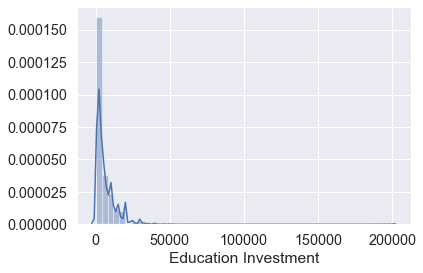

In [1606]:
# histogram
sb.distplot(df_merged['Education Investment'])

In [1607]:
df_merged

,fid,provcd,Education Investment,Family Income,familysize,Housing Price,Edu Attainment of Parents,Number of Children,Deposit,cid,Mean Community Income
0,110009.0,北京市,15000,75000,7,16000000,6.0,2,5000,11830.0,69666.666667
1,110026.0,北京市,5000,110000,4,1500000,6.0,2,50000,11830.0,69666.666667
2,110031.0,北京市,10000,24000,3,1000000,4.0,1,0,11830.0,69666.666667
3,110043.0,北京市,2500,48000,7,810000,6.0,1,0,11820.0,48000.000000
4,110092.0,北京市,6000,71000,5,1680432,4.0,3,0,11840.0,48333.333333
...,...,...,...,...,...,...,...,...,...,...,...
5771,621862.0,甘肃省,600,7482,3,60000,3.0,1,0,21990.0,9208.583333
5772,621866.0,甘肃省,200,12280,6,30000,3.0,3,0,21990.0,9208.583333
5773,621868.0,甘肃省,500,3128,6,50000,2.0,2,0,21990.0,9208.583333
5774,621870.0,甘肃省,2000,21970,6,20000,4.0,2,0,21990.0,9208.583333


In [1608]:
X_variables = df_merged[['Family Income','Number of Children','Edu Attainment of Parents', 'Deposit']]
Y = df_merged['Education Investment']

X = sm.add_constant(X_variables)
model = sm.OLS(Y, X).fit()

print_model = model.summary()
print(print_model)

                             OLS Regression Results                             
Dep. Variable:     Education Investment   R-squared:                       0.168
Model:                              OLS   Adj. R-squared:                  0.167
Method:                   Least Squares   F-statistic:                     290.4
Date:                  Thu, 13 May 2021   Prob (F-statistic):          7.55e-228
Time:                          11:50:01   Log-Likelihood:                -59660.
No. Observations:                  5776   AIC:                         1.193e+05
Df Residuals:                      5771   BIC:                         1.194e+05
Df Model:                             4                                         
Covariance Type:              nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
co

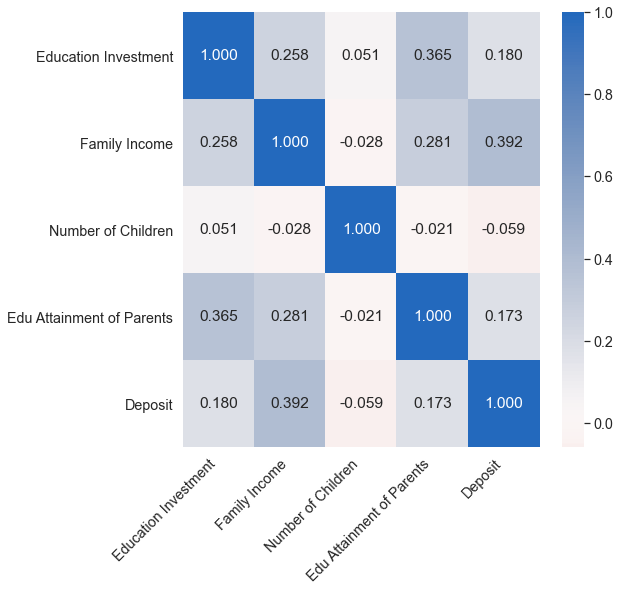

In [1609]:
sb.set(font_scale=1.3)

num_vars = ['Education Investment',
            'Family Income','Number of Children','Edu Attainment of Parents', 'Deposit']

plt.figure(figsize = [8, 8])
g = sb.heatmap(df_merged[num_vars].corr(), annot = True, fmt = '.3f', cmap = 'vlag_r', center = 0)
g.set_xticklabels(labels=num_vars,rotation=45, ha='right')
plt.show()

## Control Children Gender

In [1610]:
df_famconf_gender = df_cfps2010famconf[['pid', 'fid',
                                        'tb2_a_c1', 'tb2_a_c2', 'tb2_a_c3', 'tb2_a_c4', 'tb2_a_c5',
                                        'tb2_a_c6', 'tb2_a_c7', 'tb2_a_c8', 'tb2_a_c9', 'tb2_a_c10']]
df_famconf_gender.head()

,pid,fid,tb2_a_c1,tb2_a_c2,tb2_a_c3,tb2_a_c4,tb2_a_c5,tb2_a_c6,tb2_a_c7,tb2_a_c8,tb2_a_c9,tb2_a_c10
0,110001101.0,110001.0,1.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0
1,110001102.0,110001.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0
2,110002101.0,110002.0,0.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0
3,110002102.0,110002.0,0.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0
4,110002103.0,110002.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0


In [1611]:
df_famconf_gender['Num of Boys'] = (df_famconf_gender[['tb2_a_c1', 'tb2_a_c2', 'tb2_a_c3', 'tb2_a_c4', 'tb2_a_c5',
                                                       'tb2_a_c6', 'tb2_a_c7', 'tb2_a_c8', 'tb2_a_c9', 'tb2_a_c10']] == 1).sum(axis=1)
df_famconf_gender['Num of Girls'] = (df_famconf_gender[['tb2_a_c1', 'tb2_a_c2', 'tb2_a_c3', 'tb2_a_c4', 'tb2_a_c5',
                                                        'tb2_a_c6', 'tb2_a_c7', 'tb2_a_c8', 'tb2_a_c9', 'tb2_a_c10']] == 0).sum(axis=1)

df_famconf_gender.head(5)

<ipython-input-1611-50cf71bfd997>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_famconf_gender['Num of Boys'] = (df_famconf_gender[['tb2_a_c1', 'tb2_a_c2', 'tb2_a_c3', 'tb2_a_c4', 'tb2_a_c5',
<ipython-input-1611-50cf71bfd997>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_famconf_gender['Num of Girls'] = (df_famconf_gender[['tb2_a_c1', 'tb2_a_c2', 'tb2_a_c3', 'tb2_a_c4', 'tb2_a_c5',


,pid,fid,tb2_a_c1,tb2_a_c2,tb2_a_c3,tb2_a_c4,tb2_a_c5,tb2_a_c6,tb2_a_c7,tb2_a_c8,tb2_a_c9,tb2_a_c10,Num of Boys,Num of Girls
0,110001101.0,110001.0,1.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0,1,0
1,110001102.0,110001.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0,0,0
2,110002101.0,110002.0,0.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0,0,1
3,110002102.0,110002.0,0.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0,0,1
4,110002103.0,110002.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0,0,0


In [1612]:
df_famconf_gender = df_famconf_gender.groupby('fid')['Num of Boys', 'Num of Girls'].max().reset_index()
df_famconf_gender.sample(5)

<ipython-input-1612-ad706b75d1c0>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_famconf_gender = df_famconf_gender.groupby('fid')['Num of Boys', 'Num of Girls'].max().reset_index()


,fid,Num of Boys,Num of Girls
3757,230432.0,4,2
12020,510635.0,1,1
11858,510447.0,1,3
9905,440464.0,3,4
11345,500154.0,3,2


In [1613]:
# Merge
df_merged = pd.merge(df_merged, df_famconf_gender,
                    on='fid',
                    how='inner')
df_merged.sample(5)

,fid,provcd,Education Investment,Family Income,familysize,Housing Price,Edu Attainment of Parents,Number of Children,Deposit,cid,Mean Community Income,Num of Boys,Num of Girls
1148,220225.0,吉林省,6000,6700,3,158969,4.0,1,0,12450.0,27914.285714,0,1
3694,440812.0,广东省,500,98000,9,8693868,5.0,3,30000,21770.0,93815.333333,3,1
4970,610321.0,陕西省,14000,26393,4,1000,6.0,4,0,13150.0,24489.000000,2,2
5611,621490.0,甘肃省,500,6470,6,45022,2.0,2,0,22440.0,13742.923077,1,1
1303,230415.0,黑龙江省,150,17000,3,10000,2.0,0,5000,12170.0,16209.090909,1,0


In [1614]:
df_merged['Number of Children'] = df_merged['Num of Boys'] + df_merged['Num of Girls']
df_merged

,fid,provcd,Education Investment,Family Income,familysize,Housing Price,Edu Attainment of Parents,Number of Children,Deposit,cid,Mean Community Income,Num of Boys,Num of Girls
0,110009.0,北京市,15000,75000,7,16000000,6.0,2,5000,11830.0,69666.666667,1,1
1,110026.0,北京市,5000,110000,4,1500000,6.0,2,50000,11830.0,69666.666667,1,1
2,110031.0,北京市,10000,24000,3,1000000,4.0,1,0,11830.0,69666.666667,1,0
3,110043.0,北京市,2500,48000,7,810000,6.0,2,0,11820.0,48000.000000,1,1
4,110092.0,北京市,6000,71000,5,1680432,4.0,3,0,11840.0,48333.333333,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5771,621862.0,甘肃省,600,7482,3,60000,3.0,1,0,21990.0,9208.583333,1,0
5772,621866.0,甘肃省,200,12280,6,30000,3.0,3,0,21990.0,9208.583333,1,2
5773,621868.0,甘肃省,500,3128,6,50000,2.0,4,0,21990.0,9208.583333,2,2
5774,621870.0,甘肃省,2000,21970,6,20000,4.0,3,0,21990.0,9208.583333,2,1


### Only Girls (没有男孩)

In [1619]:
df_merged_girls = df_merged[df_merged['Num of Boys'] == 0]

X_variables = df_merged_girls[['Family Income','Num of Girls','Edu Attainment of Parents', 'Deposit']]
Y = df_merged_girls['Education Investment']

X = sm.add_constant(X_variables)
model = sm.OLS(Y, X).fit()

print_model = model.summary()
print(print_model)

                             OLS Regression Results                             
Dep. Variable:     Education Investment   R-squared:                       0.117
Model:                              OLS   Adj. R-squared:                  0.113
Method:                   Least Squares   F-statistic:                     29.61
Date:                  Thu, 13 May 2021   Prob (F-statistic):           3.78e-23
Time:                          11:50:58   Log-Likelihood:                -9335.1
No. Observations:                   896   AIC:                         1.868e+04
Df Residuals:                       891   BIC:                         1.870e+04
Df Model:                             4                                         
Covariance Type:              nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
co

### Only Boys

In [1621]:
df_merged_boys = df_merged[df_merged['Num of Girls'] == 0]

X_variables = df_merged_boys[['Family Income','Num of Boys','Edu Attainment of Parents', 'Deposit']]
Y = df_merged_boys['Education Investment']

X = sm.add_constant(X_variables)
model = sm.OLS(Y, X).fit()

print_model = model.summary()
print(print_model)

                             OLS Regression Results                             
Dep. Variable:     Education Investment   R-squared:                       0.141
Model:                              OLS   Adj. R-squared:                  0.138
Method:                   Least Squares   F-statistic:                     55.33
Date:                  Thu, 13 May 2021   Prob (F-statistic):           3.03e-43
Time:                          11:51:20   Log-Likelihood:                -14182.
No. Observations:                  1353   AIC:                         2.837e+04
Df Residuals:                      1348   BIC:                         2.840e+04
Df Model:                             4                                         
Covariance Type:              nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
co

### 有男孩

In [1624]:
df_merged_with_boys = df_merged[df_merged['Num of Boys'] != 0]

X_variables = df_merged_with_boys[['Family Income','Number of Children','Edu Attainment of Parents', 'Deposit']]
Y = df_merged_with_boys['Education Investment']

X = sm.add_constant(X_variables)
model = sm.OLS(Y, X).fit()

print_model = model.summary()
print(print_model)

                             OLS Regression Results                             
Dep. Variable:     Education Investment   R-squared:                       0.179
Model:                              OLS   Adj. R-squared:                  0.179
Method:                   Least Squares   F-statistic:                     266.5
Date:                  Thu, 13 May 2021   Prob (F-statistic):          2.02e-207
Time:                          12:18:28   Log-Likelihood:                -50304.
No. Observations:                  4880   AIC:                         1.006e+05
Df Residuals:                      4875   BIC:                         1.006e+05
Df Model:                             4                                         
Covariance Type:              nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
co